In [1]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
FOLDER_PATH = '../../Data/t_cv/'
def get_result(model_type):
    file_paths = glob.glob(f'{FOLDER_PATH}*{model_type}_window3_cv[0-9].csv')
    results = []
    for file_path in file_paths:
        df = pd.read_csv(file_path)

        best_row = df.loc[df['r2_test'].idxmax()]

        file_name = os.path.basename(file_path)
        short_name = file_name.split(f'_{model_type}_window3')[0]

        results.append({
            'Model': short_name,
            'Best_Epoch': best_row['Epoch'],
            'r2_test': best_row['r2_test']
        })

    result_df = pd.DataFrame(results)

    grouped = result_df.groupby('Model').agg(
        avg_r2=('r2_test', 'mean'),
        std_r2=('r2_test', 'std'),
        count=('r2_test', 'count')
    ).reset_index()
    name_mapping = {
        'esm1b': 'ESM-1b',
        'esm1v': 'ESM-1v',
        'esm2': 'ESM2',
        'esmc': 'ESMC',
        'prott5': 'ProtT5',
    }
    desired_display_order = ['ESM-1b', 'ESM-1v', 'ESM2', 'ESMC', 'ProtT5']
    grouped['Display_Model'] = grouped['Model'].map(name_mapping)
    grouped = grouped[grouped['Display_Model'].isin(desired_display_order)]
    grouped['Display_Model'] = pd.Categorical(grouped['Display_Model'], categories=desired_display_order, ordered=True)
    grouped = grouped.sort_values('Display_Model').reset_index(drop=True)
    return grouped

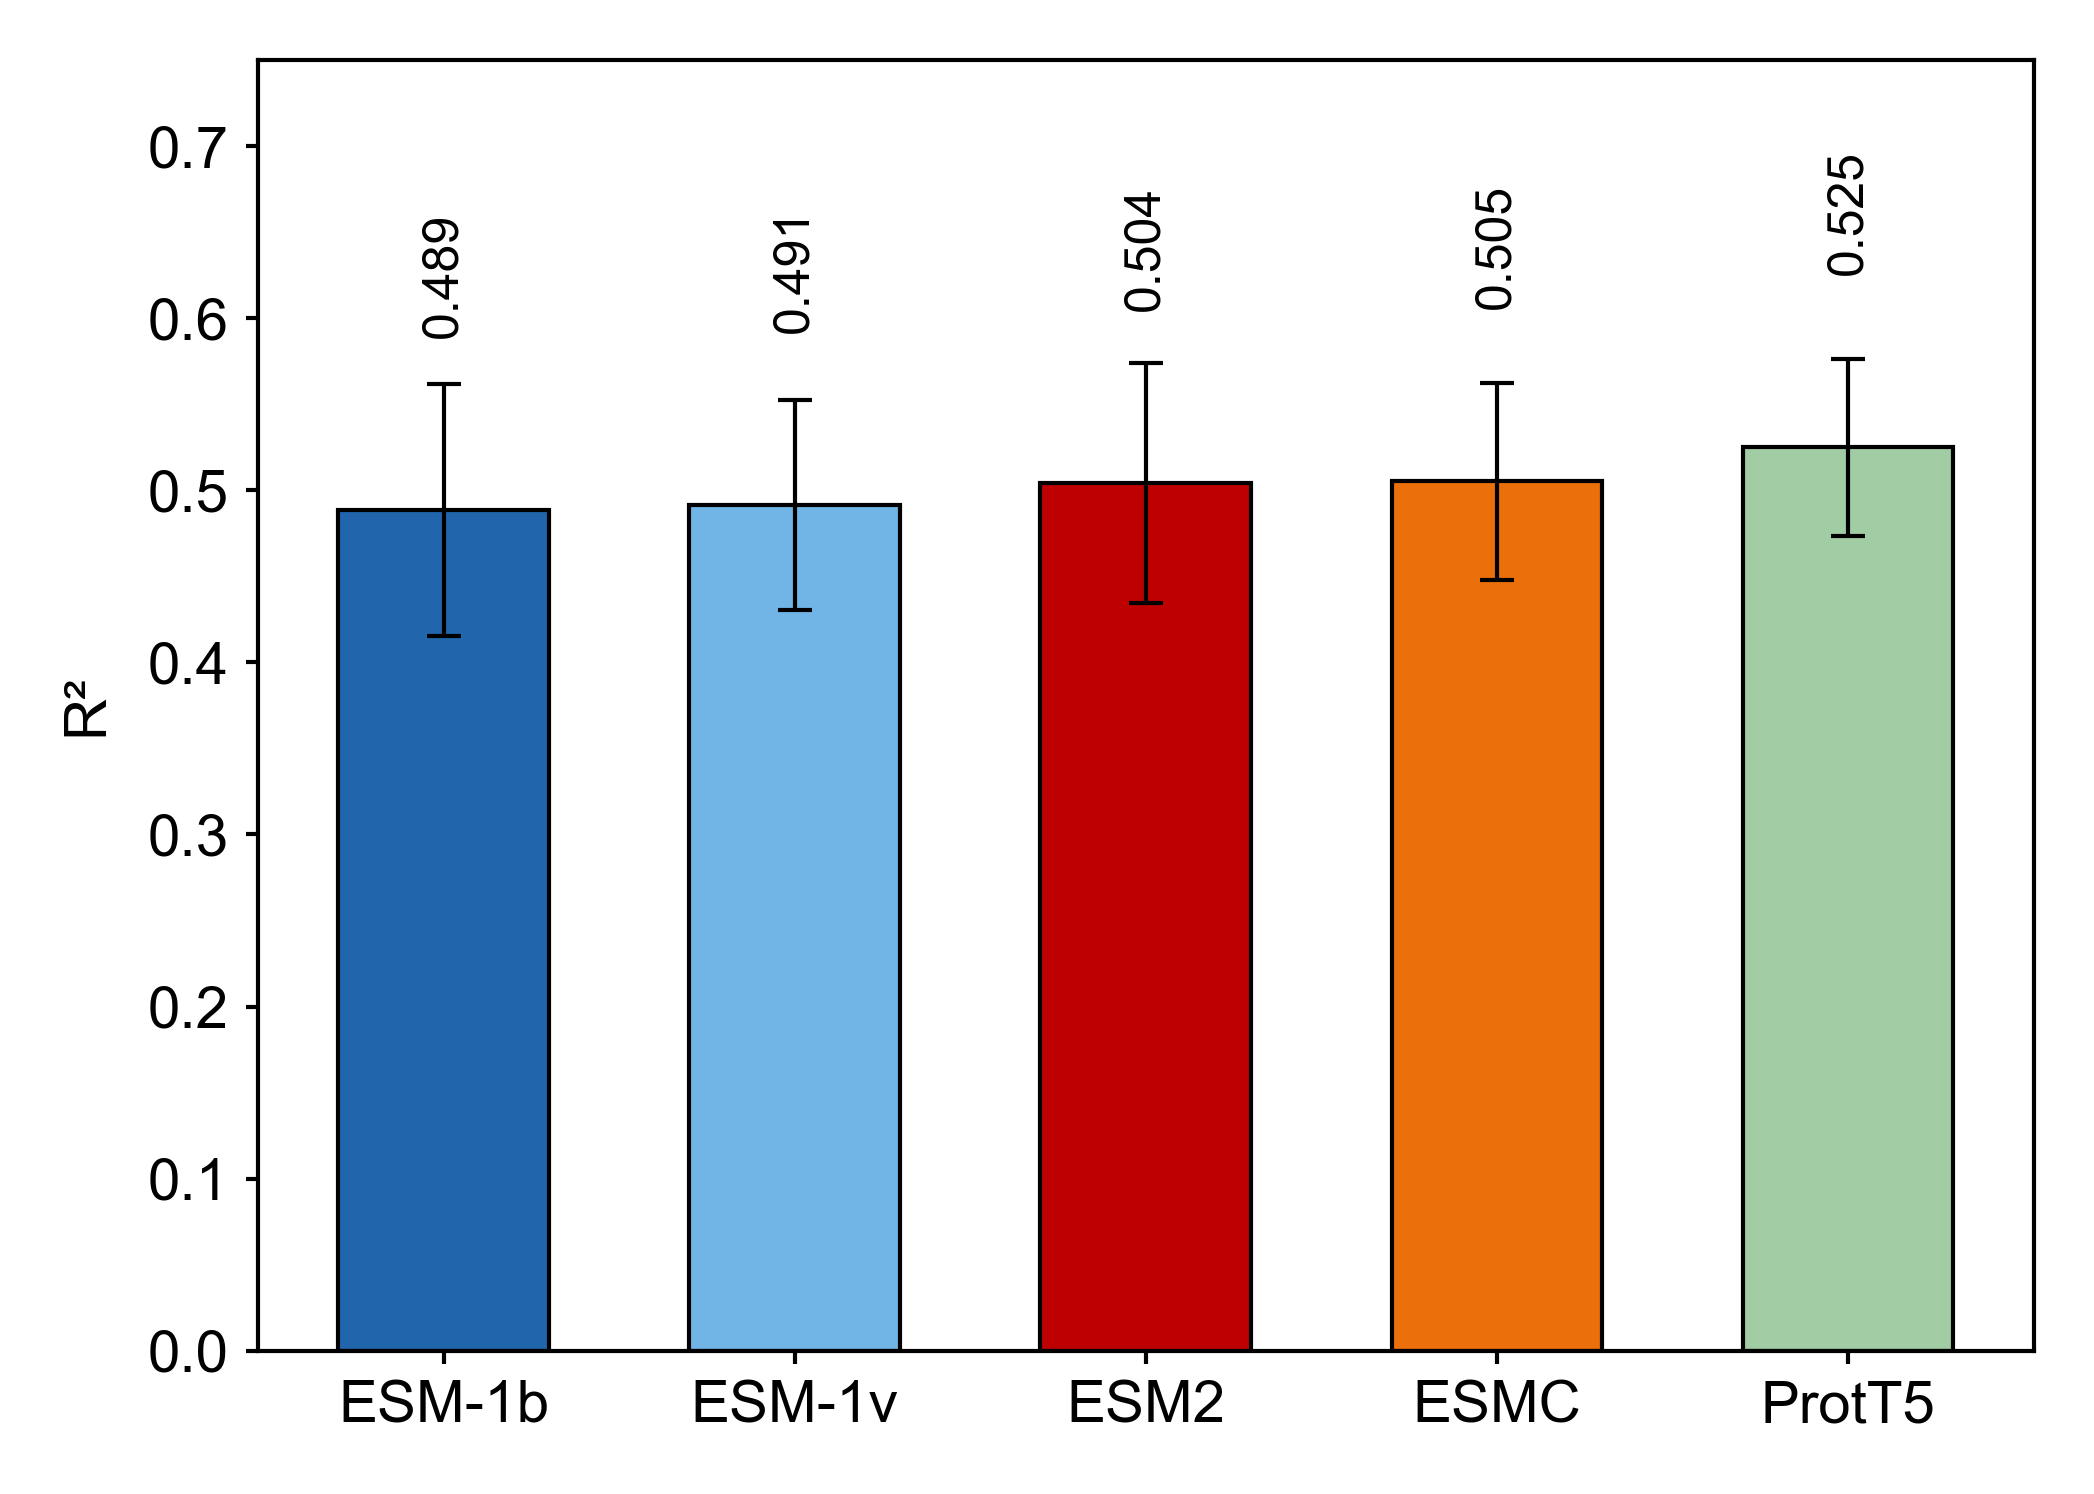

In [2]:
grouped = get_result('topt')
models = grouped['Model']
display_models = grouped['Display_Model']
means = grouped['avg_r2']
errors = grouped['std_r2']

plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})

model_color_palette = {
    'ESM-1b': '#2166AC',
    'ESM-1v': '#71B4E6',
    'ESM2': '#BF0001',
    'ESMC': '#EB700C',
    'ProtT5': '#A2CCA4',
}

bar_colors = [model_color_palette[model] for model in display_models]

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=600)

bars = ax.bar(models, means,
              color=bar_colors,
              width=0.6,
              edgecolor='black',
              linewidth=0.5,
              alpha=1)

ax.errorbar(models, means, yerr=errors,
            fmt='none',
            ecolor='black',
            elinewidth=0.5,
            capsize=2.0,
            capthick=0.5)


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.1,
            f'{yval:.3f}',
            ha='center',
            va='bottom',
            fontsize=6,
            rotation=90)


ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

ax.tick_params(axis='both', direction='out', width=0.5, length=1.5, pad=2)

ax.set_ylabel('R²', fontsize=7)
ax.set_ylim(0, 0.75)

ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(display_models, ha='center')
ax.set_xlabel('')

fig.tight_layout()

plt.savefig('../../Figure/fig4D-Topt.pdf', dpi=600, bbox_inches='tight')

plt.show()

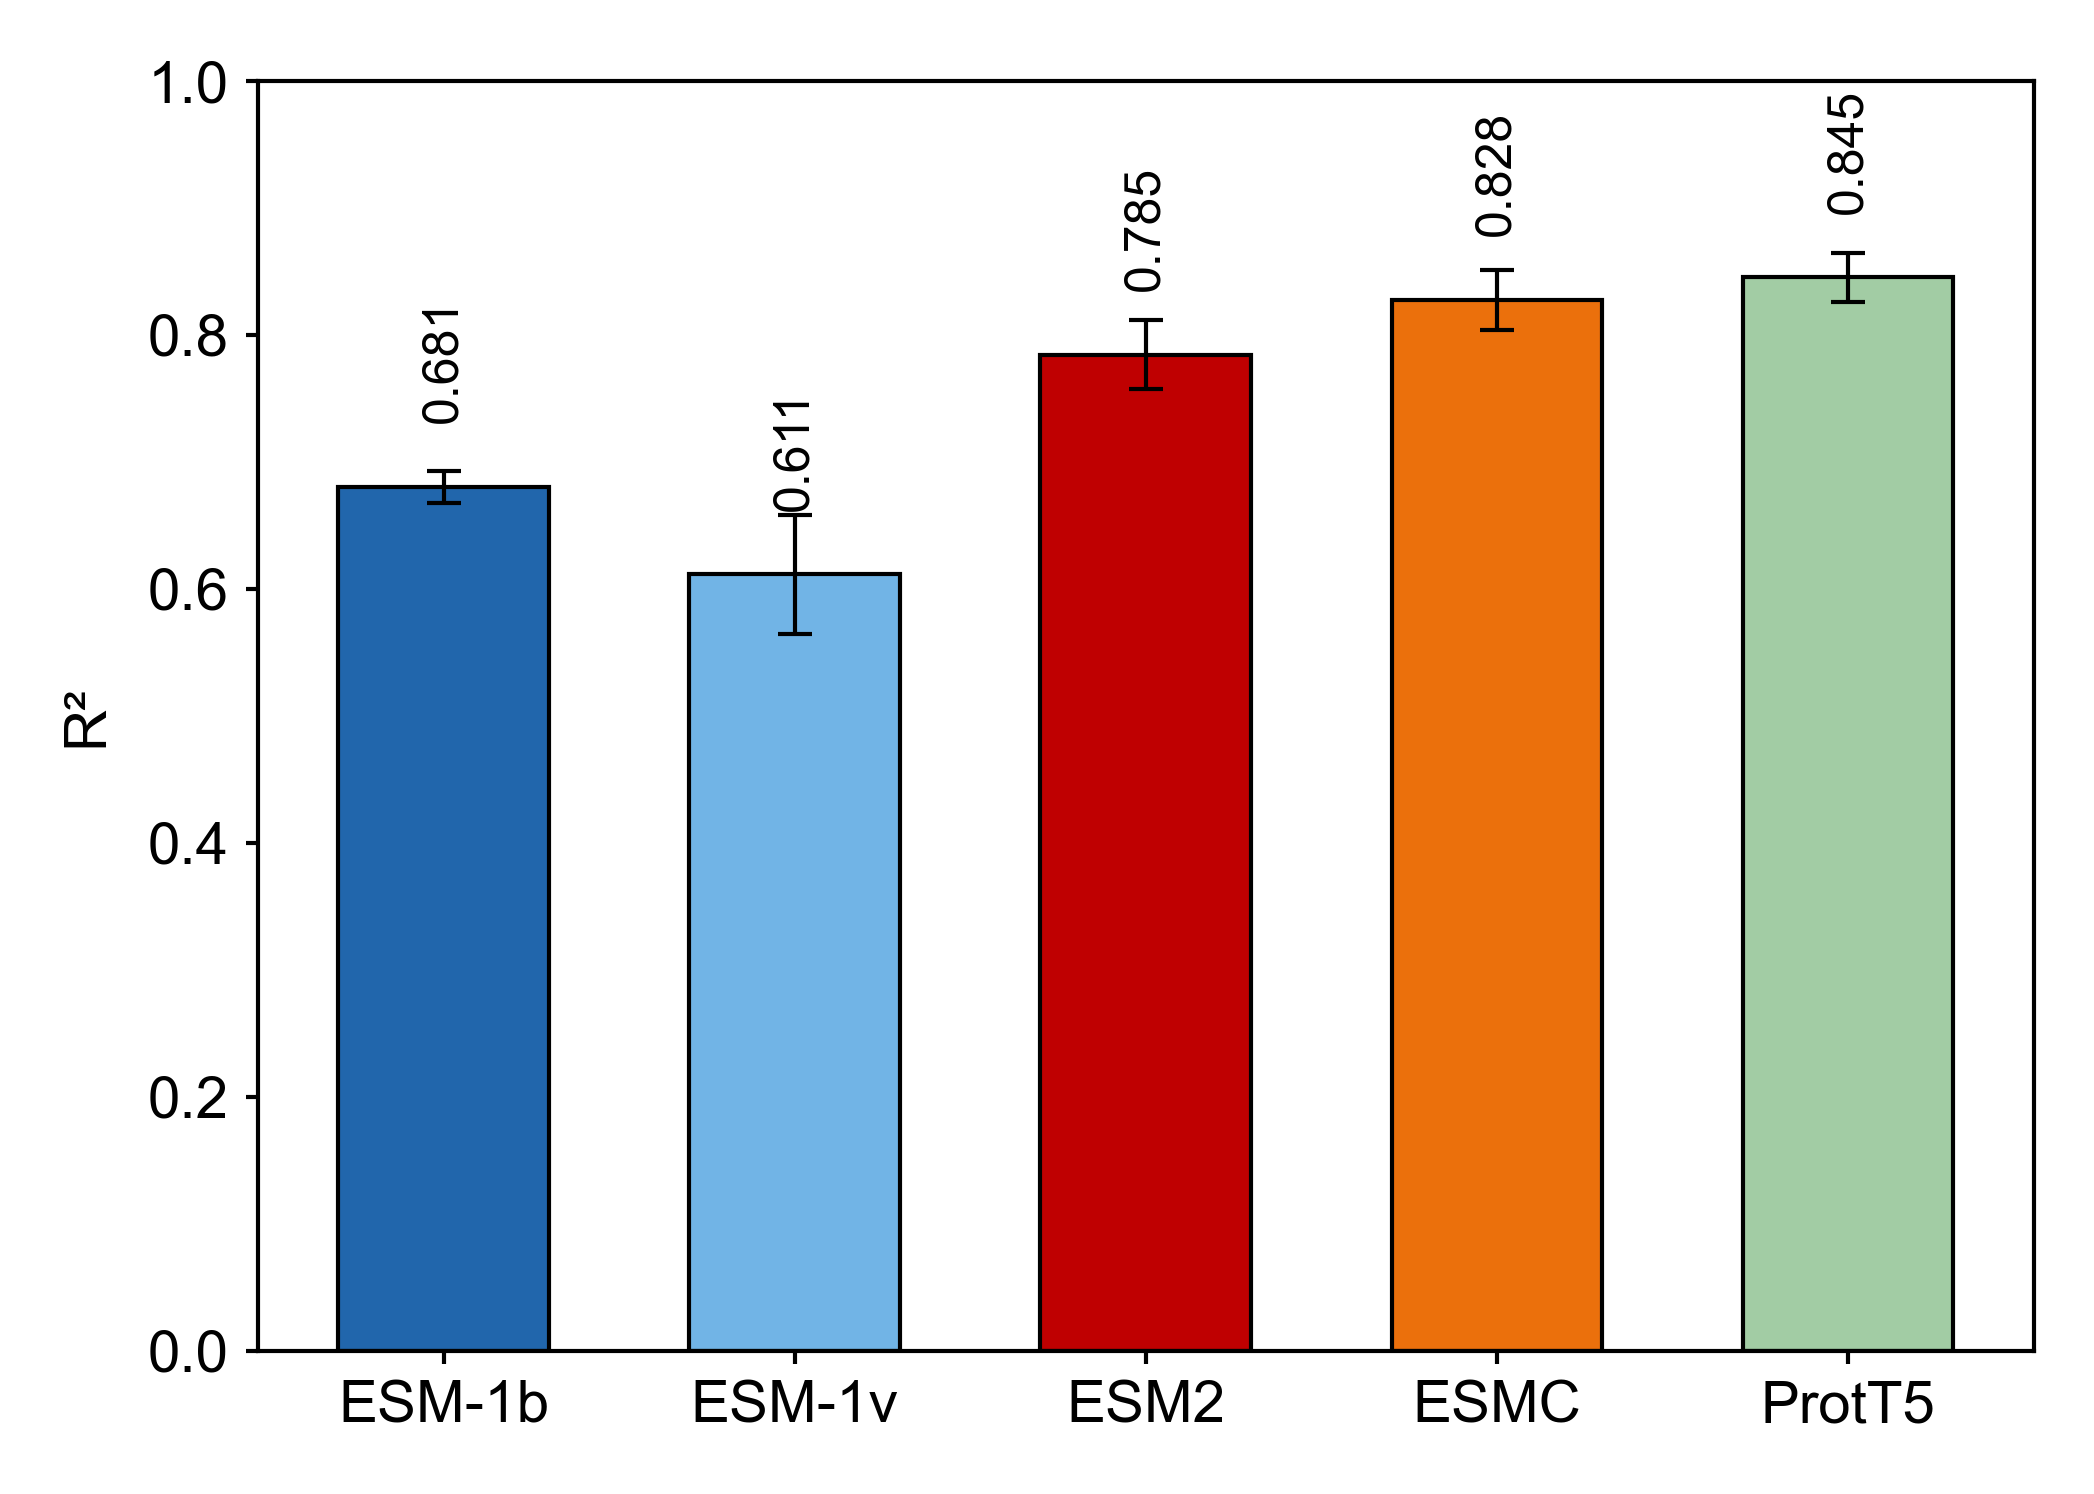

In [3]:
grouped = get_result('tm')
models = grouped['Model']
display_models = grouped['Display_Model']
means = grouped['avg_r2']
errors = grouped['std_r2']

plt.rcParams.update({
    'font.size': 7,
    'font.family': 'Arial',
    'mathtext.fontset': 'custom',
    'mathtext.rm': 'Arial',
    'mathtext.it': 'Arial:italic',
    'mathtext.bf': 'Arial:bold',
    'pdf.fonttype': 42,
    'ps.fonttype': 42
})


model_color_palette = {
    'ESM-1b': '#2166AC',
    'ESM-1v': '#71B4E6',
    'ESM2': '#BF0001',
    'ESMC': '#EB700C',
    'ProtT5': '#A2CCA4',
}
bar_colors = [model_color_palette[model] for model in display_models]

fig, ax = plt.subplots(figsize=(3.5, 2.5), dpi=600)

bars = ax.bar(models, means,
              color=bar_colors,
              width=0.6,
              edgecolor='black',
              linewidth=0.5,
              alpha=1)

ax.errorbar(models, means, yerr=errors,
            fmt='none',
            ecolor='black',
            elinewidth=0.5,
            capsize=2.0,
            capthick=0.5)


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.05,
            f'{yval:.3f}',           
            ha='center',             
            va='bottom',             
            fontsize=6,              
            rotation=90)             


ax.spines['top'].set_linewidth(0.5)
ax.spines['right'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)

ax.tick_params(axis='both', direction='out', width=0.5, length=1.5, pad=2)

ax.set_ylabel('R²', fontsize=7)
ax.set_ylim(0, 1)
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels(display_models, ha='center')
ax.set_xlabel('')


fig.tight_layout()

plt.savefig('../../Figure/fig4E-Tm.pdf', dpi=600, bbox_inches='tight')

plt.show()